## plots_sim

This jn is intended to create plots about the simulations

All the parameters are smarized in a JSON file in the same folder as this notebook.

Run this jupyter notebook in the LIneA env with the following command:
<br>
`jupyter nbconvert --execute --to html --EmbedImagesPreprocessor.embed_images=True plots_sim.ipynb`
<br>
and after the command has finished, run the following cell:
<br>
`cp plots_sim.html ~/public_html/gawa_processes/NNNNN/simulations/`
<br>
where NNNNN is the process number.

In [1]:
import numpy as np
from pathlib import Path
import healpy as hp
import json, os, sys, glob
from time import sleep
import tabulate
from ga_sim.plot import (
    general_plots,
    plot_ftp,
    plots_ang_size,
    plot_err,
    plot_clusters_clean
)

Below, load the JSON config file (change any parameter in case you want) and create folders for results.

Load the maps for reddening.

In [2]:
confg = "ga_sim.json"

with open(confg) as fstream:
    param = json.load(fstream)

## Plots

### Table of Simulated Objects

The cell below show the complete table of simulated clusters released in this simulation. An improved description of columns is provided:
<br>
<br>
0-HPX64: Ipix where the cluster is centered (Nested=True, Nside=64);
<br>
1-N: Star counts in cluster (before filtering stars from crowding);
<br>
2-MV: Absolute magnitude in V band (before filtering stars from crowding);
<br>
3-SNR: Poissonian Signal to Noise Ratio of the cluster. This is estimated by star counts within 2 arcmin over
<br>
root square of star counts within an annulus of rin=10 arcmin and rout = 25 arcmin, normalized
<br>
by area. This is calculated before filtering stars from crowding;
<br>
4-N_f: Star counts of filtering in stars by crowding;
<br>
5-MV_f: Absolute magnitude in V band after removing stars by crowding;
<br>
6-SNR_f: Signal to Noise Ratio calculated as described in (3) but after removing stars from crowding;
<br>
7-L: Galactic longitude (l), in degrees;
<br>
8-B: Galactic latitude (b), in degrees;
<br>
9-ra: Right Ascension (Equatorial coordinate), in degrees;
<br>
10-dec: Declination (Equatorial coordinate), in degrees;
<br>
11-r_exp: Exponential radius of cluster, in parsecs;
<br>
12-ell: Ellipticity (a - b) / a;
<br>
13-pa: Angular position (from North to East), in degrees;
<br>
14-mass: Visible mass of cluster (star accounted for mass are stars brighter than the limiting magnitude
<br>
of the simulation), in Solar masses;
<br>
15-dist: distance of the simulated cluster from Sun, in parsecs;

In [3]:
with open(param['star_clusters_simulated']) as f:
    first_line = f.readline()

IPIX_with_clusters = np.loadtxt(param['star_clusters_simulated'], usecols=(0), dtype=int, unpack=True)

table = tabulate.tabulate(np.loadtxt(param['star_clusters_simulated']),
                          tablefmt='html',
                          headers=(first_line[1:].split()))

print('Total of clusters simulated: {:d}\n'.format(len(IPIX_with_clusters)))

table

Total of clusters simulated: 10



0-HPX64,1-N,2-MV,3-SNR,4-N_f,5-MV_f,6-SNR_f,7-L,8-B,9-ra,10-dec,11-r_exp,12-ell,13-pa,14-mass,15-dist
34611,381,-5.72,32.27,188,-5.05,21.55,234.685,-42.9356,67.5,-33.5101,53.13,0.07,119.25,349.73,823580
34612,420,-5.57,35.27,178,-4.45,21.52,234.901,-41.774,68.9062,-33.5101,68.48,0.2,38.88,316.45,737684
34614,274,-4.4,28.85,201,-4.14,23.43,233.837,-42.2534,68.2031,-32.7972,78.71,0.19,29.93,357.14,493570
34615,345,-5.62,32.25,206,-5.09,22.44,233.023,-41.5573,68.9062,-32.09,47.9,0.15,0.58,331.37,779326
34616,428,-5.03,34.68,209,-4.17,22.53,234.482,-44.0988,66.0937,-33.5101,54.12,0.06,94.42,368.22,564006
34617,285,-5.26,29.29,167,-4.77,21.76,233.608,-43.4235,66.7969,-32.7972,50.11,0.07,59.73,354.37,717261
34619,279,-5.06,31.96,176,-4.61,24.39,232.525,-43.9118,66.0937,-32.09,63.26,0.13,19.64,345.45,711252
34620,327,-4.66,29.68,159,-3.95,20.97,232.768,-42.7337,67.5,-32.09,48.86,0.09,87.21,351.7,508182
34621,281,-4.28,29.1,189,-3.91,22.3,231.961,-42.0303,68.2031,-31.3882,70.46,0.12,40.4,390.53,515244
34622,271,-4.89,28.64,124,-3.74,19.66,231.693,-43.2144,66.7969,-31.3882,98.89,0.1,20.42,328.5,596239


Plot footprint map to check area.

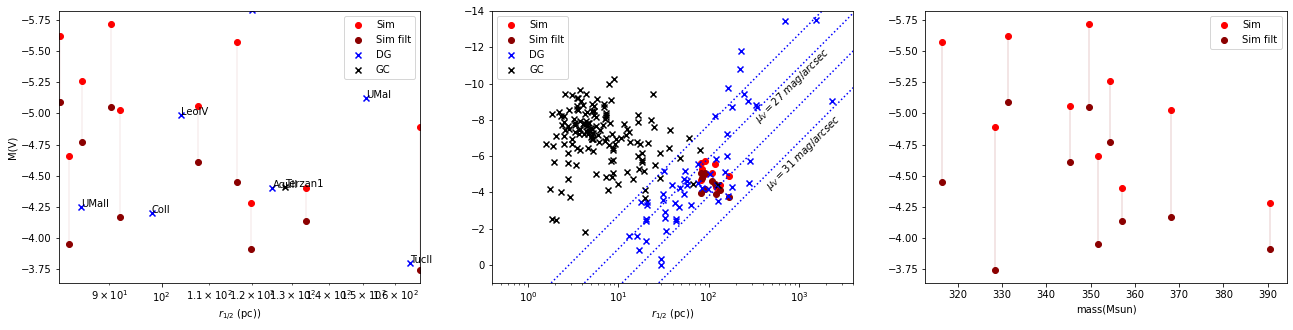

In [4]:
general_plots(param['star_clusters_simulated'], param['output_plots'])

In [ ]:
# Reading [M/H], log_age, mini, g
iso_info = np.loadtxt(param['file_iso'], usecols=(1, 2, 3, 26), unpack=True)
FeH_iso = iso_info[0][0]
logAge_iso = iso_info[1][0]
m_ini_iso = iso_info[2]
g_iso = iso_info[3]

print('[Fe/H]={:.2f}, Age={:.2f} Gyr'.format(FeH_iso, 10**(logAge_iso-9)))

mM_mean = (param['mM_max'] + param['mM_min']) / 2.
print(np.max(m_ini_iso[g_iso + mM_mean < param['mmax']]))
mean_mass = (np.min(m_ini_iso[g_iso + mM_mean < param['mmax']]) +
             np.max(m_ini_iso[g_iso + mM_mean < param['mmax']])) / 2.

# Diretório onde estão os arquivo _clus.dat
plots_ang_size(param['star_clusters_simulated'], param['results_path'],
               param['mmin'], param['mmax'], param['cmin'], param['cmax'],
               param['output_plots'], FeH_iso)


[Fe/H]=-2.00, Age=13.00 Gyr
0.78367275


In [ ]:
hpx_ftp = param['results_path'] + "/ftp_4096_nest.fits"

plot_ftp(hpx_ftp, param['star_clusters_simulated'],
         param['final_cat'], param['ra_max'], param['ra_min'], param['dec_min'], param['dec_max'], param['output_plots'])


Plotting errors in main magnitude band.

In [ ]:
# Plots to analyze the simulated clusters.
# plot_err(param['final_cat'], param['output_plots'])


Plot position of stars in clusters comparing filtered in and not filtered stars. The region sampled is the center of the cluster where the crowding is more intense.

In [ ]:
ipix_cats = [(param['hpx_cats_path'] + '/' + '{:d}'.format(i) + '.fits') for i in IPIX_with_clusters]
ipix_clean_cats = [(param['hpx_cats_clean_path'] + '/' + '{:d}'.format(i) + '.fits') for i in IPIX_with_clusters]
                   
plot_clusters_clean(ipix_cats, ipix_clean_cats,
                    param['nside_ini'],
                    param['ra_str'],
                    param['dec_str'],
                    0.01,
                    param['output_plots'])


The images below are the plots comparing simulations and real clusters.

In [ ]:
# export_results('../public_html/gawa_processes/')